# 1. Load and inspect the data

We will use the Fashion MNIST dataset (built into Keras/TF), which are all small images of different clothing items. They can be found in `keras.datasets.fashion_mnist`

1. Load the dataset and display the size of the various parts

In [1]:
# Importing modules
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sn
import tensorflow as tf
from tensorflow import keras 
from numpy.random import seed
from tensorflow.keras.utils import set_random_seed
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.model_selection import train_test_split
%matplotlib inline

# Loading the dataset and converting to pandas dataframe
fashion_mnist = keras.datasets.fashion_mnist
(x_train_full, y_train_full), (x_test_full, y_test_full) = fashion_mnist.load_data()

# Displaying size out dataset
print("Training set predictor array shape", x_train_full.shape)
print("Training set response array shape", y_train_full.shape)
print("Test set predictor array shape", x_test_full.shape)
print("Test set response array shape", y_test_full.shape)

Training set predictor array shape (60000, 28, 28)
Training set response array shape (60000,)
Test set predictor array shape (10000, 28, 28)
Test set response array shape (10000,)


2. Display, graphically, one example image of each class

Index of first occurrence of each class dict_values([1, 16, 5, 3, 19, 8, 18, 6, 23, 0])


Text(0.5, -0.02, 'Figure 1: Part 1.2 - Class image examples')

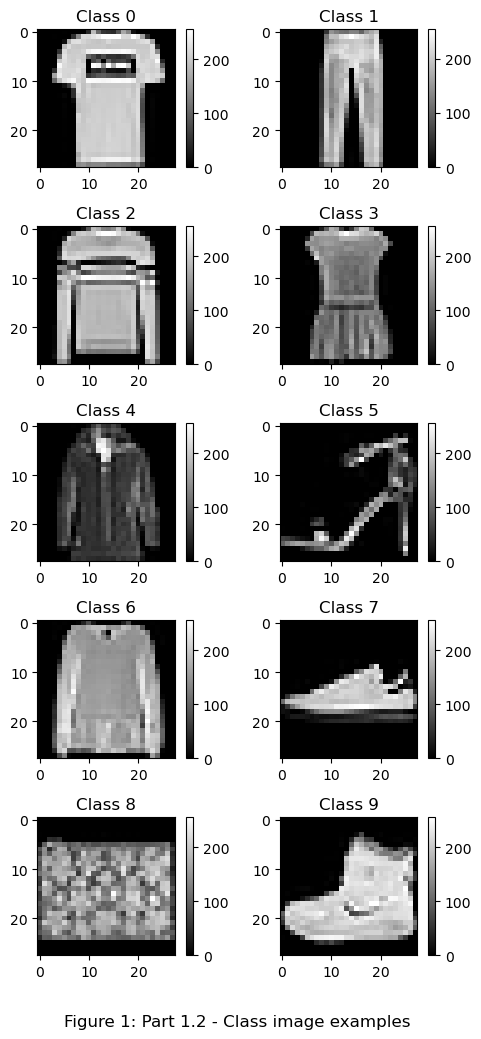

In [2]:
# Obtaining samples
classes = pd.DataFrame(y_train_full)
class_type = range(0,10,1)
samples = {}

for item in class_type:
        index = np.where(classes[0] == item)[0][0]
        samples[item] = index
print("Index of first occurrence of each class", samples.values())

# Demonstration of images from each class
position = 1
plt.figure(figsize = [5, 10])
for class_, index in samples.items():
    plt.subplot(5,2,position)
    plt.imshow(x_train_full[index,:,:], cmap='gray')
    plt.grid(False)
    plt.title("Class " + str(class_))
    plt.colorbar()
    plt.tight_layout()
    position += 1
plt.suptitle("Figure 1: Part 1.2 - Class image examples",x = 0.5, y = -.02)

3. Display summary stats/info for class labels

In [3]:
# Printing y_train summary statistics
y_train_df = pd.DataFrame({'Classes' : y_train_full})


# Confirming even totals with a count of each class
counts = pd.DataFrame(y_train_df['Classes'].value_counts()).sort_index()
counts['Instances of Class'] = counts['Classes']
counts.drop(columns='Classes', inplace=True)
counts['Item Type'] = pd.Series(['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'])
print("The only information thats inforamtive and meaningful can be seen below:")
counts

The only information thats inforamtive and meaningful can be seen below:


,Instances of Class,Item Type
0,6000,T-shirt/top
1,6000,Trouser
2,6000,Pullover
3,6000,Dress
4,6000,Coat
5,6000,Sandal
6,6000,Shirt
7,6000,Sneaker
8,6000,Bag
9,6000,Ankle boot


4. Split the non-test labels and images into training and validation datasets according to a 80/20 split

In [4]:
# Splitting training set
x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, test_size = 0.2, stratify = y_train_full)

# Confirming split
print("Training set predictor array shape", x_train.shape)
print("Training set response array shape", y_train.shape)
print("Validation set predictor array shape", x_val.shape)
print("Validation set response array shape", y_val.shape)

Training set predictor array shape (48000, 28, 28)
Training set response array shape (48000,)
Validation set predictor array shape (12000, 28, 28)
Validation set response array shape (12000,)


5. Do appropriate pre-processing of the images and/or labels

Index of first occurrence of each class dict_values([1, 2, 5, 27, 0, 7, 6, 32, 16, 3])


Text(0.5, -0.02, 'Figure 2: Part 1.5 - Preprocessed class image examples')

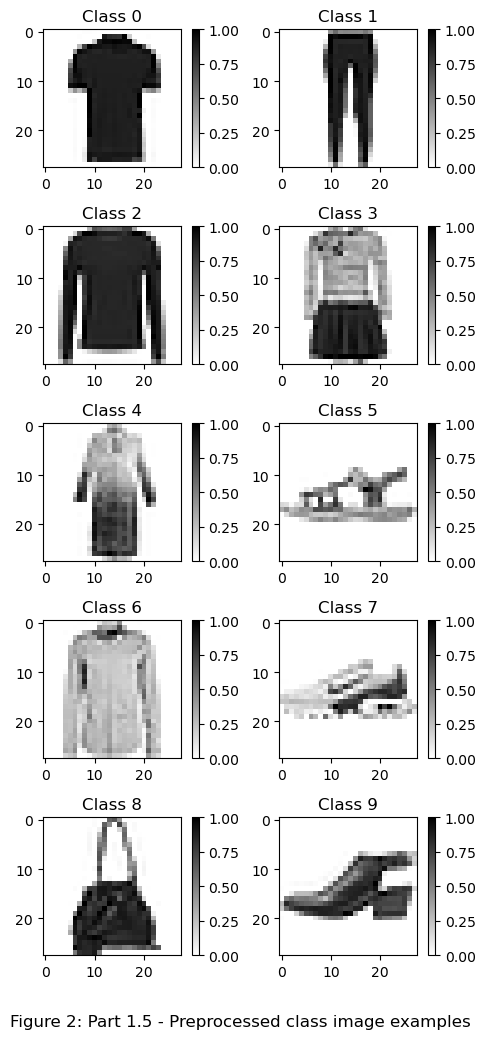

In [5]:
# Normalizing the data
## The images have betwen 0 and 255 pixels, so they can be normalized by diding by 255

## Training and validation sets
x_train_pp = x_train/255
x_val_pp = x_val/255

## pre-emptively pre-processing the test set
x_test_full_pp = x_test_full/255

## Obtaining samples
classes = pd.DataFrame(y_train)
class_type = range(0,10,1)
samples = {}

for item in class_type:
        index = np.where(classes[0] == item)[0][0]
        samples[item] = index
print("Index of first occurrence of each class", samples.values())

## Observing alteration
position = 1
plt.figure(figsize = [5,10])
for class_, index in samples.items():
    plt.subplot(5,2,position)
    plt.title('Class ' + str(class_))
    plt.imshow(x_train_pp[index,:,:], cmap = plt.cm.binary)
    plt.grid(False)
    plt.colorbar()
    plt.tight_layout()
    position += 1
plt.suptitle("Figure 2: Part 1.5 - Preprocessed class image examples",x = 0.5, y = -.02)

# 2. Build a network

Write a *function* that creates a Keras model of a densely connected neural network and returns it, in a state where it is ready to have `fit()` run on it.
 - The API should take in:
     1. values for the number of neurons in hidden layers 1, 2 and 3 (as a list or array - where the length of the list/array indicates fewer hidden layers)
     2. a string for the loss function
     3. the learning rate
 - In addition:
     4. set the optimizer to be Adam
     5. set the activation functions in the hidden layers to be ReLU (**I've made this an 'activation' parameter to simplify the next few sections**)
     6. include the additional metric of 'accuracy'


In [6]:
# Creating model building function 
def dense_network(training_set, nodes_list, loss_function, learning_rate, activation):
    ### This Function creates a neural network, taking the training data set, the number of hidden layers, 
    ### neurons desired in each layer, the loss function, the learning rate, and activation function as parameters.
    
    # Setting seed for reproducibility within session, can't achieve perfect reproducibility betweens sessions
    # (Due to GPU differences between sessions)
    set_random_seed(1)
    
    # Initilising model
    model = keras.models.Sequential()
    # Crating input layer
    xsize, ysize = training_set.shape[1:3]
    model.add(keras.layers.Flatten(input_shape = [xsize , ysize]))
    # Creating hidden layers with loss function ReLU 
    layer_number = 0
    for number in range(0, (len(nodes_list)), 1):
        model.add(keras.layers.Dense(nodes_list[number], activation = activation, 
        #To simplify for future alterations I've made the activation function a parameter as well
                                     dtype=np.float32))
        layer_number += 1
    # Creating output layer with the 10 output classes   
    model.add(keras.layers.Dense(10, activation = "softmax"))
    # Compiling model using the Adam Optimizer and including the accuracy metric
    model.compile(loss = loss_function, 
                  optimizer = keras.optimizers.Adam(learning_rate = learning_rate),
                  metrics = ["accuracy"])
    return model

In [7]:
# Testing the output is as expected
## With three hidden layers
test = dense_network(x_train_pp, [10,11,12], "sparse_categorical_crossentropy", 0.01, "relu")
test.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 10)                7850      
                                                                 
 dense_1 (Dense)             (None, 11)                121       
                                                                 
 dense_2 (Dense)             (None, 12)                144       
                                                                 
 dense_3 (Dense)             (None, 10)                130       
                                                                 
Total params: 8,245
Trainable params: 8,245
Non-trainable params: 0
_________________________________________________________________


In [8]:
# Testing the output is as expected
## With two hidden layers
test_2 = dense_network(x_train_pp, [10,11], "sparse_categorical_crossentropy", 0.01, "relu")
test_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 10)                7850      
                                                                 
 dense_5 (Dense)             (None, 11)                121       
                                                                 
 dense_6 (Dense)             (None, 10)                120       
                                                                 
Total params: 8,091
Trainable params: 8,091
Non-trainable params: 0
_________________________________________________________________


# 3. Train the network

1. Call the function written in the previous section to generate a model with the following arguments: 2 hidden layers only, first with 128 nodes and the second with 64 nodes; loss function of categorical cross-entropy (you should determine which type is suitable for your data); and a learning rate of 0.001.

In [9]:
# Generating model with the desired specs
part3_model = dense_network(x_train_pp, [128, 64], "sparse_categorical_crossentropy", 0.001, "relu")

# We use sparse categorical cross entropy because the labels are not one-hot encoded but are integers from 0-9. 

2. Print a summary of the model that is generated.

In [10]:
# Printing summary
part3_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_7 (Dense)             (None, 128)               100480    
                                                                 
 dense_8 (Dense)             (None, 64)                8256      
                                                                 
 dense_9 (Dense)             (None, 10)                650       
                                                                 
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


3. Train the model using a batch size of 2000 and 5 epochs, saving the training history.

In [11]:
# Fitting the model
part3_history = part3_model.fit(x_train_pp, y_train, epochs = 5, batch_size = 2000,
                   validation_data = (x_val_pp, y_val), verbose = 0)

# Printing 
print("The improvement over the 5 epochs:")
part_3_hist_df = pd.DataFrame(part3_history.history)
part_3_hist_df.index = [1,2,3,4,5]
part_3_hist_df

The improvement over the 5 epochs:


,loss,accuracy,val_loss,val_accuracy
1,1.294314,0.587521,0.736641,0.722167
2,0.639001,0.776292,0.561372,0.809583
3,0.530152,0.820667,0.495128,0.826500
4,0.479856,0.834687,0.471021,0.836250
5,0.452772,0.842229,0.441077,0.846250


4. Display the learning curves.

Text(0.5, -0.1, 'Figure 3: Part 3.4 - Learning curve \n(ReLU activation function)\n')

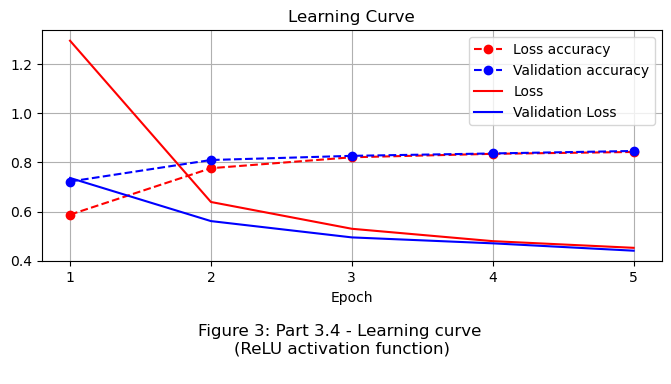

In [12]:
# Displaying Learning curves
fig1 = plt.figure(figsize = [8,3])
# Accuracy curves
plt.plot(part_3_hist_df.index, part_3_hist_df['accuracy'], label = "Loss accuracy", 
         color = 'r', linestyle = 'dashed', marker = 'o')
plt.plot(part_3_hist_df.index, part_3_hist_df['val_accuracy'], label = "Validation accuracy", 
         color = 'b', marker = 'o', linestyle = 'dashed')
# Loss curves
plt.plot(part_3_hist_df.index, part_3_hist_df['loss'], label = "Loss",
         color = 'r',)
plt.plot(part_3_hist_df.index, part_3_hist_df['val_loss'], label = "Validation Loss",
        color = 'b')
plt.xlabel('Epoch')
plt.xticks([1,2,3,4,5])
plt.grid(which = 'major', axis = 'both')
plt.legend(loc = 'best')
plt.title("Learning Curve")
plt.suptitle("Figure 3: Part 3.4 - Learning curve \n(ReLU activation function)\n", x = 0.5, y = -.1)

5. Answer the following questions on fitting (give reasons in each case):
 - Does this show overfitting?
 - Does this show underfitting?
 - Has the model converged?
 - Is it stable or unstable?

***Answer***

 In figure 3, we can see that the training and validation Loss is reducing with every epoch. We can also see that the accuracy is increasing with every epoch. Wih only 5 epochs, the model seems to be a little shy of convergence. The vaidation loss is lower than the training loss initially but the difference becomes quite small over the 5 epochs. Naturally, the accuracy of the validation set is higher than the training set, with the difference again reducing nicely across the 5 epochs.
 
Looking at the model after the 5 epochs:
- There is no signs of overfitting. The model performs as well on the test set as it does on the validation set containing unseen images meaning it is generalizing well.
- There is no sign of underfitting, that is not to say it's achieving perfect accuracy. Only that the model performs comparably well on the validation set.
- The model does not appear to have converged yet, as indicated by the fact that gradients are not yet observed to be 0.
- The model is stable with all gradients gradually approaching 0.

# 4. Network architecture comparison

Build and train two alternative networks.

1.1. Build and train a network using a sigmoid activation function in the hidden layers, plotting the learning curves.
   

The improvement over the 5 epochs
       loss  accuracy  val_loss  val_accuracy
1  2.081669  0.387729  1.771471      0.589500
2  1.553308  0.633792  1.343059      0.646583
3  1.204489  0.672396  1.074654      0.686750
4  0.992360  0.703917  0.912661      0.714750
5  0.859072  0.731792  0.805232      0.738167


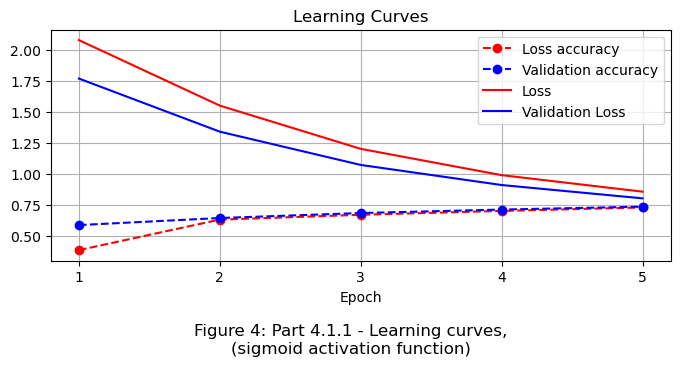

In [13]:
# Building model with new specs
part4a_model = dense_network(x_train_pp, [128, 64], "sparse_categorical_crossentropy", 0.001, "sigmoid")

# Fitting the model
part4a_history = part4a_model.fit(x_train_pp, y_train, epochs = 5, batch_size = 2000,
                   validation_data = (x_val_pp, y_val),verbose = 0)

# Printing the history
print("The improvement over the 5 epochs")
part_4a_hist_df = pd.DataFrame(part4a_history.history)
part_4a_hist_df.index = [1,2,3,4,5]
print(part_4a_hist_df)

# Displaying Learning Curves
fig2 = plt.figure(figsize = [8,3])
# Accuracy learning Curves
plt.plot(part_4a_hist_df.index, part_4a_hist_df['accuracy'], label = "Loss accuracy",
        color = 'r', linestyle = 'dashed', marker = 'o')
plt.plot(part_4a_hist_df.index, part_4a_hist_df['val_accuracy'], label = "Validation accuracy",
         color = 'b', marker = 'o', linestyle = 'dashed')
# Loss learning Curves
plt.plot(part_4a_hist_df.index, part_4a_hist_df['loss'], label = "Loss", 
        color = 'r')
plt.plot(part_4a_hist_df.index, part_4a_hist_df['val_loss'], label = "Validation Loss",
        color = 'b')
plt.suptitle("Figure 4: Part 4.1.1 - Learning curves,\n(sigmoid activation function)", x = 0.5, y = -.1)
plt.xlabel('Epoch')
plt.xticks([1,2,3,4,5])
plt.grid(which = 'major', axis = 'both')
plt.title("Learning Curves")
plt.legend()

1.2. Build and train a network using a LeakyReLU activation function in the hidden layers, plotting the learning curves. 

The improvement over the 5 epochs
       loss  accuracy  val_loss  val_accuracy
1  1.178065  0.607104  0.701925      0.742750
2  0.617556  0.784750  0.548585      0.811000
3  0.524921  0.821542  0.492550      0.828583
4  0.483210  0.834875  0.479082      0.832417
5  0.461172  0.840563  0.453012      0.842583


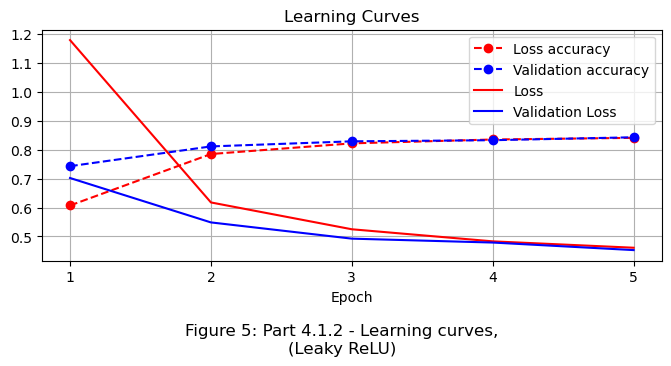

In [14]:
# Building model with new specs
part4b_model = dense_network(x_train_pp, [128, 64], "sparse_categorical_crossentropy", 0.001, "LeakyReLU")

# Fitting the model
part4b_history = part4b_model.fit(x_train_pp, y_train, epochs = 5, batch_size = 2000,
                   validation_data = (x_val_pp, y_val),verbose = 0)

# Printing 
print("The improvement over the 5 epochs")
part_4b_hist_df = pd.DataFrame(part4b_history.history)
part_4b_hist_df.index = [1,2,3,4,5]
print(part_4b_hist_df)

# Displaying Learning Curves
fig3 = plt.figure(figsize = [8,3])
# Accuracy learning curves
plt.plot(part_4b_hist_df.index, part_4b_hist_df['accuracy'], label = "Loss accuracy",
        color = 'r', linestyle = 'dashed', marker = 'o')
plt.plot(part_4b_hist_df.index, part_4b_hist_df['val_accuracy'], label = "Validation accuracy",
         color = 'b', linestyle = 'dashed', marker = 'o')
# Loss learning curves
plt.plot(part_4b_hist_df.index, part_4b_hist_df['loss'], label = "Loss", 
        color = 'r')
plt.plot(part_4b_hist_df.index, part_4b_hist_df['val_loss'], label = "Validation Loss",
        color = 'b')
plt.suptitle("Figure 5: Part 4.1.2 - Learning curves,\n(Leaky ReLU)", x = 0.5, y = -.1)
plt.xlabel('Epoch')
plt.xticks([1,2,3,4,5])
plt.grid(which = 'major', axis = 'both')
plt.title("Learning Curves")
plt.legend()

2. Compare the performance appropriately to select the best activation function from these two and ReLU above (state your reasons).


In [15]:
# Comparing the learning curves
print('Results from the sigmid activation:')
print(part_4a_hist_df.to_markdown())
print()
print("Results from the Leaky ReLU activation function\n")
print(part_4b_hist_df.to_markdown())

Results from the sigmid activation:
|    |     loss |   accuracy |   val_loss |   val_accuracy |
|---:|---------:|-----------:|-----------:|---------------:|
|  1 | 2.08167  |   0.387729 |   1.77147  |       0.5895   |
|  2 | 1.55331  |   0.633792 |   1.34306  |       0.646583 |
|  3 | 1.20449  |   0.672396 |   1.07465  |       0.68675  |
|  4 | 0.99236  |   0.703917 |   0.912661 |       0.71475  |
|  5 | 0.859072 |   0.731792 |   0.805232 |       0.738167 |

Results from the Leaky ReLU activation function

|    |     loss |   accuracy |   val_loss |   val_accuracy |
|---:|---------:|-----------:|-----------:|---------------:|
|  1 | 1.17806  |   0.607104 |   0.701925 |       0.74275  |
|  2 | 0.617556 |   0.78475  |   0.548585 |       0.811    |
|  3 | 0.524921 |   0.821542 |   0.49255  |       0.828583 |
|  4 | 0.48321  |   0.834875 |   0.479082 |       0.832417 |
|  5 | 0.461172 |   0.840563 |   0.453012 |       0.842583 |


***Answer***

The Leaky ReLU has lower Loss values and higher accuracy scores in every epoch, both in training and validation. As a result it has better final accuracy at the end of the 5th epoch. Leaky ReLU is better suited than the previous two activation functions.

Because the sigmoid function can have values between 0 and 1, it can lead to the vanishing gradient problem. The derivative of this function will also always be positive, resulting in information being lost with each pass. This problem is mainly a concern for deeper networks, but remains a drawback.

The ReLU function doesn't have the same backpropogation errors. And while some nodes die with a typical ReLU function, the leaky ReLU resolves this because the slope to the left on the x-axis is not equal to 0 as is the case for the typical ReLU and sigmoid functions. This results in a speedier and more computationally efficient journey to convergence.    

 3. Repeat the model building and training for 4.1.1 and 4.1.2 above and compare the new results with the previous ones. How different are the results?  And how important is this difference?

In [16]:
# Repeating 
# Part 4.1.1
# Building model with new specs
part4a_model = dense_network(x_train_pp, [128, 64], "sparse_categorical_crossentropy", 0.001, "sigmoid")
part4a_history = part4a_model.fit(x_train_pp, y_train, epochs = 5, batch_size = 2000,
                   validation_data = (x_val_pp, y_val),verbose = 0)
part_4a_hist_df = pd.DataFrame(part4a_history.history)
part_4a_hist_df.index = [1,2,3,4,5]
part_4a_hist_df

# Part 4.1.2
part4b_model = dense_network(x_train_pp, [128, 64], "sparse_categorical_crossentropy", 0.001, "LeakyReLU")
part4b_history = part4b_model.fit(x_train_pp, y_train, epochs = 5, batch_size = 2000,
                   validation_data = (x_val_pp, y_val),verbose = 0)
part_4b_hist_df = pd.DataFrame(part4b_history.history)
part_4b_hist_df.index = [1,2,3,4,5]
part_4b_hist_df

# Comparing the learning curves
print('Results from the sigmid activation:')
print(part_4a_hist_df.to_markdown())
print()
print("Results from the Leaky ReLU activation function\n")
print(part_4b_hist_df.to_markdown())

Results from the sigmid activation:
|    |     loss |   accuracy |   val_loss |   val_accuracy |
|---:|---------:|-----------:|-----------:|---------------:|
|  1 | 2.08167  |   0.387729 |   1.77147  |       0.5895   |
|  2 | 1.55331  |   0.633792 |   1.34306  |       0.646583 |
|  3 | 1.20449  |   0.672396 |   1.07465  |       0.68675  |
|  4 | 0.99236  |   0.703917 |   0.912661 |       0.71475  |
|  5 | 0.859072 |   0.731792 |   0.805232 |       0.738167 |

Results from the Leaky ReLU activation function

|    |     loss |   accuracy |   val_loss |   val_accuracy |
|---:|---------:|-----------:|-----------:|---------------:|
|  1 | 1.17806  |   0.607104 |   0.701925 |       0.74275  |
|  2 | 0.617556 |   0.78475  |   0.548585 |       0.811    |
|  3 | 0.524921 |   0.821542 |   0.49255  |       0.828583 |
|  4 | 0.48321  |   0.834875 |   0.479082 |       0.832417 |
|  5 | 0.461172 |   0.840563 |   0.453012 |       0.842583 |


I've re-run the code and the output is exactly the same. This is likely because I considered reproducibility in the model building function and set a seed. This will give me the same output for any given session. However, machine learning models can give different errors and accuracies for a number of reasons including:
- the training data has changed (model sensitivity) 
- the model uses a stochastic learning algorithm (slight variations in the model itself, such as the initial weights, etc.)
- the model's evaluation procedure has stochastic properties (such as the train test split). 
- differences in platform/hardwhare.

However, this is not a problem but a feature of deep learning. The more epochs (or the closer the model gets to convergence) the less important these differences will be.

# 5. Hyper-parameter optimisation

1. Implement early-stopping using an appropriate callback, included in the call to fit() - see example in Module 4. 

In [17]:
# Creating the early stopping callback
early_stop = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience = 3, restore_best_weights = True) 

# Implementing the early call back in the model
part5_model = dense_network(x_train_full, [128, 64], "sparse_categorical_crossentropy", 0.001, "LeakyReLU")
part5_model.fit(x_train_pp, y_train, epochs = 5, batch_size = 2000,
                validation_data = (x_val_pp, y_val),verbose = 0,
                callbacks = early_stop)

I've set patience to a conservative 3 epochs, as we're only observing 5 epochs all up

2. Run the network with a range of learning rates (0.01, 0.1, 10 and 100 _times_ the base value used above) and compare learning curves to choose the best rate.

***"times the base value used above"*** As in thoe values times 0.001?? 
***UPDATE!!*** COnfirmation in ecture that we are to simply use 0.01, 0.1, 10 and 100.

In [18]:
# Running the network on different learning rates
lr = [0.01, 0.1, 10, 100]
history_dict = {}

for item in lr:
    part5_model = dense_network(x_train_full, [128, 64], "sparse_categorical_crossentropy", item, "LeakyReLU")
    # Fitting the model
    part5_history = part5_model.fit(x_train_pp, y_train, epochs = 5, batch_size = 2000,
                   validation_data = (x_val_pp, y_val), verbose = 0, callbacks = early_stop)

    # Saving history
    part_5_hist_df = pd.DataFrame(part5_history.history)
    part_5_hist_df.index = [1,2,3,4,5]
    history_dict[str(item)] = part_5_hist_df

note: I've set the y axis to view only between 0 and 1.5


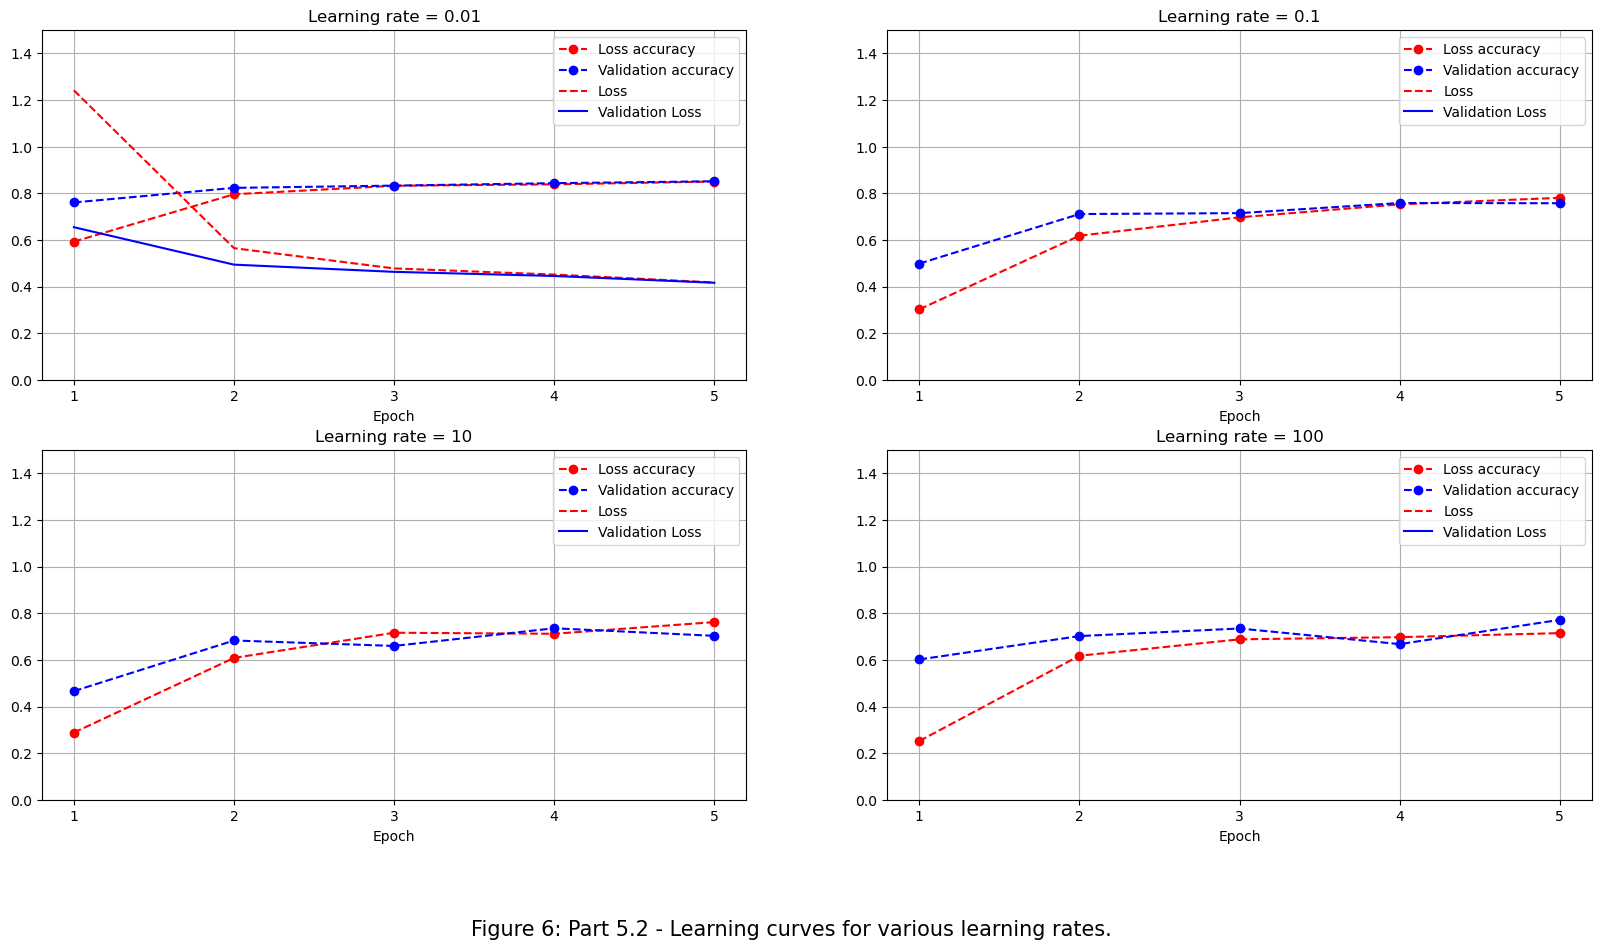

In [19]:
# Plotting the results
position = 1 
fig5 = plt.figure(figsize=[20,10])
for lr, df in history_dict.items():
    plt.subplot(2, 2, position)
    # Accuracy
    plt.plot(df.index, df['accuracy'], label = "Loss accuracy",
            color = 'r', linestyle = 'dashed', marker = 'o')
    plt.plot(df.index, df['val_accuracy'], label = "Validation accuracy",
             color = 'b', linestyle = 'dashed',marker = 'o')
    # Loss
    plt.plot(df.index, df['loss'], label = "Loss", linestyle = 'dashed',
             color = 'r')
    plt.plot(df.index, df['val_loss'], label = "Validation Loss",
             color = 'b')
    plt.title("Learning rate = " + lr)
    plt.xlabel('Epoch')
    plt.xticks([1,2,3,4,5])
    plt.grid(which = 'major', axis = 'both')
    plt.legend()
    plt.ylim([0,1.5])
    position += 1
plt.suptitle("Figure 6: Part 5.2 - Learning curves for various learning rates.", size = 15, x = 0.5, y = -.01)
print("note: I've set the y axis to view only between 0 and 1.5")

The learning rate producing the model with the best accuracy, the lowest Loss, and is closest to convergence is 0.01. The learning rate is essential for gradient descent, it determines the size of the steps to take when determining the minimum. 0.01 is the best selection among the available choices and should most consistently speed up convergence with only 5 epochs. AAs It is small we shouldn't pass by the global minima as the others appear to. It will be the best among them consistently. 

3. After having chosen the best learning rate, do a simple parameter sweep for the number of nodes in the first hidden layer (using 16, 32, 64, 128, 256, 512, 1024) and display both individual learning curves as well as a summary plot of the results showing performance vs number of nodes.
     - Note that it you want you can make the output more concise by suppressing text output with the _verbose=0_ option to fit()

In [20]:
# Running the network on different first hidden layer node counts with the selected learning rate
nodes = [16, 32, 64, 128, 256, 512, 1024]
history_dict = {}

for item in nodes:
    part5_model = dense_network(x_train_full, [item, 64], "sparse_categorical_crossentropy", 0.01, "LeakyReLU")
    # Fitting the model
    part5_history = part5_model.fit(x_train_pp, y_train, epochs = 5, batch_size = 2000,
                   validation_data = (x_val_pp, y_val), callbacks = early_stop, verbose = 0)

    # Saving history
    part_5_hist_df = pd.DataFrame(part5_history.history)
    part_5_hist_df.index = [1,2,3,4,5]
    history_dict[str(item)] = part_5_hist_df

Text(0.5, -0.01, 'Figure 7: Part 5.3 - Learning curves with various first layer node counts')

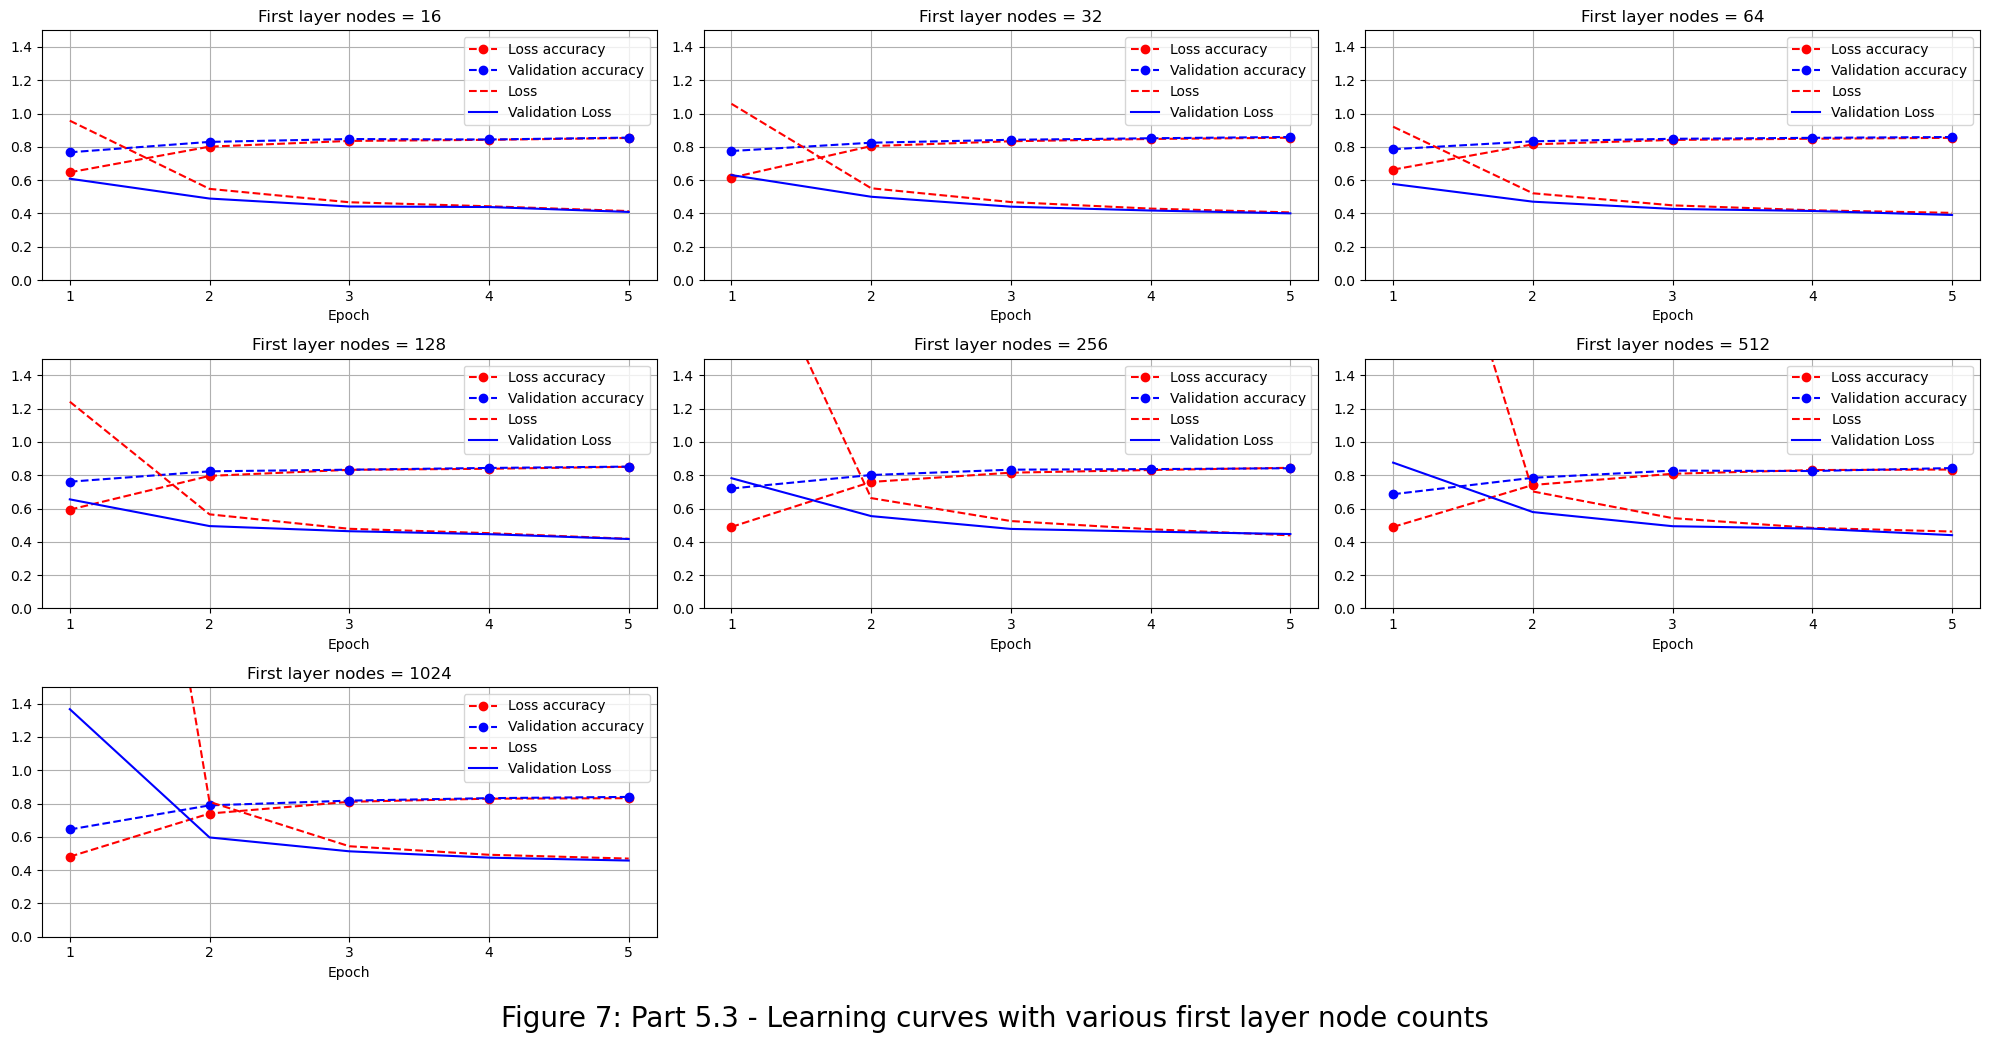

In [21]:
# Plotting the Learning curves
position = 1 
fig6 = plt.figure(figsize=[20,10])
for node_count, df in history_dict.items():
    plt.subplot(3, 3, position)
    # Accuracy
    plt.plot(df.index, df['accuracy'], label = "Loss accuracy",
            color = 'r', linestyle = 'dashed', marker ='o')
    plt.plot(df.index, df['val_accuracy'], label = "Validation accuracy",
            color = 'b', linestyle = 'dashed',marker = 'o')
    # Loss
    plt.plot(df.index, df['loss'], label = "Loss", linestyle = 'dashed',
             color = 'r')
    plt.plot(df.index, df['val_loss'], label = "Validation Loss",
            color = 'b')
    plt.title("First layer nodes = " + node_count)
    plt.xlabel('Epoch')
    plt.xticks([1,2,3,4,5])
    plt.ylim([0,1.5])
    plt.grid(which = 'major', axis = 'both')
    plt.legend()
    plt.tight_layout()
    position += 1
plt.suptitle("Figure 7: Part 5.3 - Learning curves with various first layer node counts", size = 20,  x = 0.5, y = -.01)

Text(0.5, -0.1, 'Figure 8: Part 5.3 - Summary plot of accuracies with various first layer configrations.')

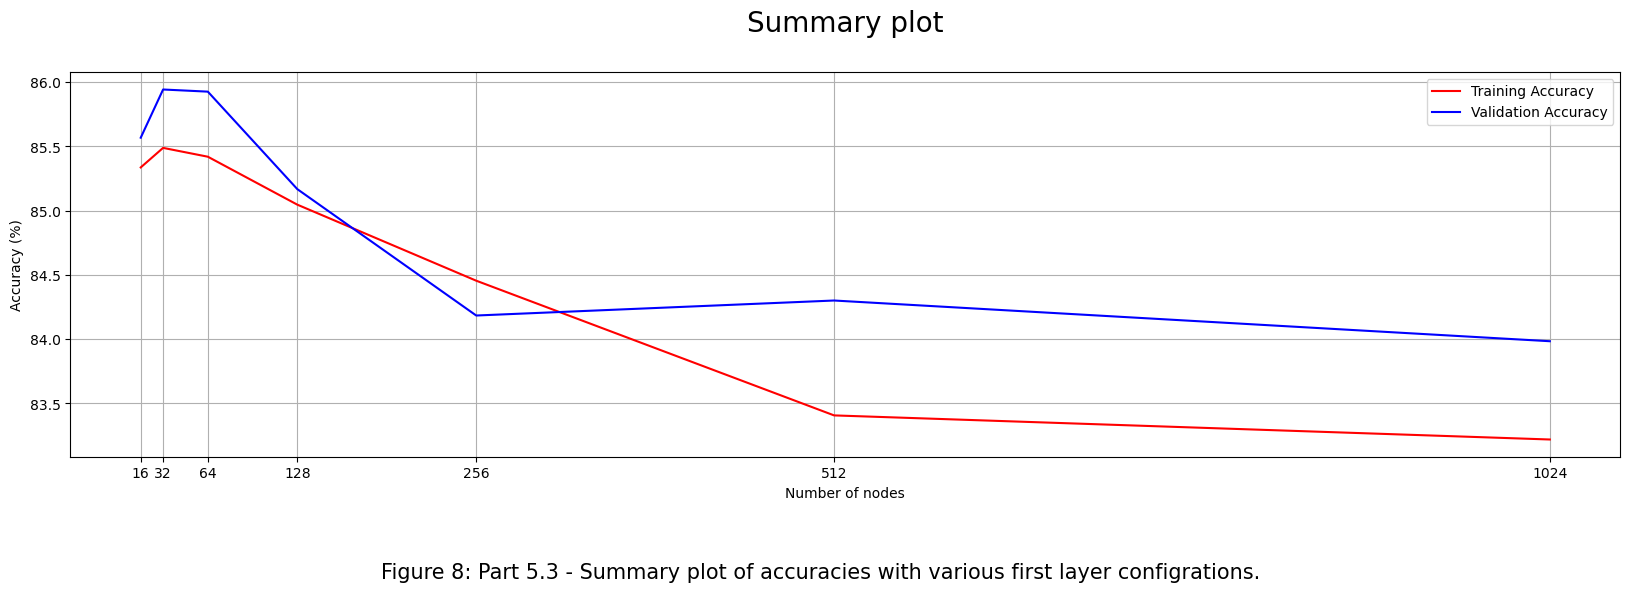

In [22]:
# Compiling accuracy scores
summary_plot_train = dict()
summary_plot_val = dict()
for node_count, df in history_dict.items():
    summary_plot_train[node_count] = float(df['accuracy'].max()*100)
    summary_plot_val[node_count] = float(df['val_accuracy'].max()*100)
    
summary_plot_train = {int(k):v for k,v in summary_plot_train.items()}
summary_plot_val = {int(k):v for k,v in summary_plot_val.items()}

# Plotting the summary plot
figure7 = plt.figure(figsize = [20,5])
plt.plot(summary_plot_train.keys(), summary_plot_train.values(), label = 'Training Accuracy', color = 'r')
plt.plot(summary_plot_val.keys(), summary_plot_val.values(), label = 'Validation Accuracy', color = 'b')
plt.title("Summary plot\n", size=20)
plt.xlabel('Number of nodes')
plt.ylabel('Accuracy (%)')
plt.xticks(list(summary_plot_train.keys()))
plt.grid(which = 'major', axis = 'both')
plt.legend()
plt.suptitle("Figure 8: Part 5.3 - Summary plot of accuracies with various first layer configrations.", size = 15,
             x = 0.5, y = -.1)

The model appears to be most accurate when the initial layer has 32 nodes. The learning curves have the best reduction in loss and improvement in accuracy in this scenario. The difference is quite minimal between the first three instances, but 32 nodes seems to be the most frequently optimal among them from observations over multiple sessions. 

There is no magic rule to determine the best topology, but this value is consistent the best. 

4. From all of the above results, choose the best hyper-parameters and clearly state your reasons. Include a comment on how reliable and repeatable you think this choice is.

***Please refer to my comments at the end of each of those questions where I have already outlined my selection***

# 6. Dropout

1. Using the best hyper-parameters from above, implement this model but include a dropout layer (with rate 0.4) between the last dense layer and the output layer.


In [23]:
# Ammending modelbuilding function 
def dense_network_with_dropout(training_set, nodes_list, loss_function, learning_rate, activation):
    ### This Function creates a neural network, taking the training data set, the number of hidden layers, 
    ### neurons desired in each layer, the loss function, the learning rate, and activation function as parameters.
    
    # Setting seed for reproducibility within session, can't achieve perfect reproducibility betweens sessions
    # (Due to GPU differences between sessions)
    set_random_seed(1)
    
    # Initilising model
    model = keras.models.Sequential()
    # Crating input layer
    xsize, ysize = training_set.shape[1:3]
    model.add(keras.layers.Flatten(input_shape = [xsize , ysize]))
    # Creating hidden layers with loss function ReLU 
    layer_number = 0
    for number in range(0, (len(nodes_list)), 1):
        model.add(keras.layers.Dense(nodes_list[number], activation = activation, 
                                     dtype=np.float32))
        layer_number += 1
    # Creating Dropout layer <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
    model.add(keras.layers.Dropout(0.4))
    # Creating output layer with the 10 output classes   
    model.add(keras.layers.Dense(10, activation = "softmax"))
    # Compiling model using the Adam Optimizer and including the accuracy metric
    model.compile(loss = loss_function, 
                  optimizer = keras.optimizers.Adam(learning_rate = learning_rate),
                  metrics = ["accuracy"])
    return model

2. Train this and compare the result with the one from the equivalent network without dropout and decide whether the network performs better with dropout or not. Show learning curves and a brief summary of the results and your decision.

In [24]:
# Building the model with the additional layer
part6_model_dropout = dense_network_with_dropout(x_train_pp, [32, 64], "sparse_categorical_crossentropy", 0.01,
                                                 "LeakyReLU")

# Fitting the model
part6_history_dropout = part6_model_dropout.fit(x_train_pp, y_train, epochs = 5, batch_size = 2000,
                   validation_data = (x_val_pp, y_val), callbacks = early_stop, verbose = 0)

# Saving history
part_6_hist_df_do = pd.DataFrame(part6_history_dropout.history)
part_6_hist_df_do.index = [1,2,3,4,5]

# Building the model without the additional layer
part6_model_without = dense_network(x_train_pp, [32, 64], "sparse_categorical_crossentropy", 0.01, "LeakyReLU")

# Fitting the model
part6_history_without = part6_model_without.fit(x_train_pp, y_train, epochs = 5, batch_size = 2000,
                                                validation_data = (x_val_pp, y_val), callbacks = early_stop, verbose = 0)

# Saving history
part_6_hist_df_wo = pd.DataFrame(part6_history_without.history)
part_6_hist_df_wo.index = [1,2,3,4,5]
print("With dropout layer:\n",part_6_hist_df_do,"\nWithout dropout layer:\n", part_6_hist_df_wo)

With dropout layer:
        loss  accuracy  val_loss  val_accuracy
1  1.132887  0.589500  0.581047      0.786000
2  0.575358  0.798333  0.470933      0.834917
3  0.494218  0.829375  0.429691      0.845583
4  0.451821  0.841292  0.402493      0.857750
5  0.437398  0.844104  0.423673      0.848083 
Without dropout layer:
        loss  accuracy  val_loss  val_accuracy
1  1.058740  0.614854  0.630636      0.775167
2  0.551370  0.804667  0.500391      0.825000
3  0.468566  0.833833  0.440816      0.842500
4  0.429233  0.847375  0.417649      0.851750
5  0.406404  0.854875  0.400654      0.859417


Text(0.5, -0.1, 'Figure 9: Part 6.2 - Learning curves for the model with and without a dropout layer')

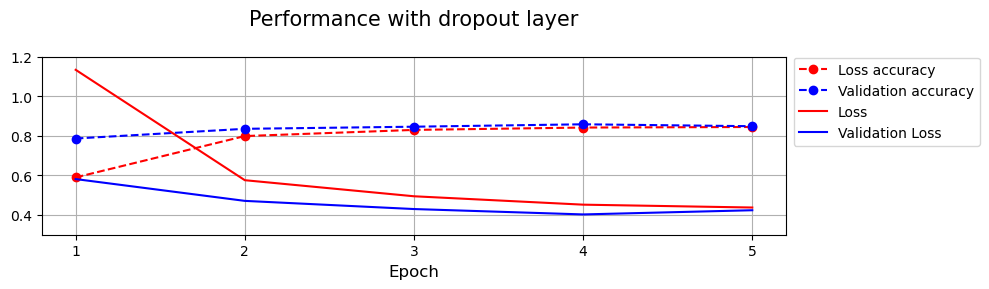

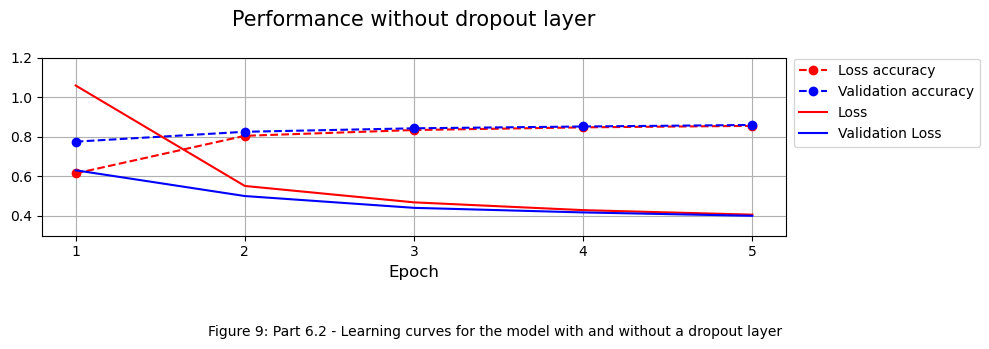

In [25]:
# Plotting learning curves
## With Dropout layer
fig6 = plt.figure(figsize=[10,3])
# Accuracy
plt.plot(part_6_hist_df_do.index, part_6_hist_df_do['accuracy'], label = "Loss accuracy",
         color = 'r', linestyle = 'dashed', marker = 'o')
plt.plot(part_6_hist_df_do.index, part_6_hist_df_do['val_accuracy'], label = "Validation accuracy",
         color = 'b', linestyle = 'dashed',marker = 'o')
# Loss
plt.plot(part_6_hist_df_do.index, part_6_hist_df_do['loss'], label = "Loss",
         color = 'r')
plt.plot(part_6_hist_df_do.index, part_6_hist_df_do['val_loss'], label = "Validation Loss",
         color = 'b')
plt.title("Performance with dropout layer\n", size = 15)
plt.xlabel('Epoch', size =12)
plt.xticks([1,2,3,4,5])
plt.grid(which = 'major', axis = 'both')
plt.legend(loc = [1.01,0.5])
plt.ylim([0.3, 1.2])
plt.tight_layout()

# Without Dropout layer
fig6 = plt.figure(figsize=[10,3])
# Accuracy
plt.plot(part_6_hist_df_wo.index, part_6_hist_df_wo['accuracy'], label = "Loss accuracy",
         color = 'r', linestyle = 'dashed', marker = 'o')
plt.plot(part_6_hist_df_wo.index, part_6_hist_df_wo['val_accuracy'], label = "Validation accuracy",
         color = 'b', linestyle = 'dashed',marker = 'o')
# Loss
plt.plot(part_6_hist_df_wo.index, part_6_hist_df_wo['loss'], label = "Loss",
         color = 'r')
plt.plot(part_6_hist_df_wo.index, part_6_hist_df_wo['val_loss'], label = "Validation Loss",
         color = 'b')
plt.title("Performance without dropout layer\n", size = 15)
plt.xlabel('Epoch', size =12)
plt.xticks([1,2,3,4,5])
plt.grid(which = 'major', axis = 'both')
plt.legend(loc = [1.01,0.5])
plt.ylim([0.3, 1.2])
plt.tight_layout()
plt.suptitle("Figure 9: Part 6.2 - Learning curves for the model with and without a dropout layer", size = 10,
             x = 0.5, y = -.1)

***Answer***

The key differences between these models is that the model without the dropout layer has a lower Loss value at the beginning. This model also performs equally well on the validation set compared to the alternative model containing a dropout layer which perfoms better on the validation set than it did on the test set. 

The dropout layer does not appear to improve the models accuracy, although it does stabilise the models jourey towards convergence. There were no serious signs of overfitting to star with, so it stands to reason that attempting to regularize with a dropout layer would be ineffective. The model generalizes well enough without neeeding to regularize. Based on the above metrics the network performs better without a dropout layer.

note: Drop out only occurs during the training of the model, not in the validating or with any other set.

# 7. Final evaluation

1. Evaluate final performance using the best network (chosen from all the options you have explored above)

In [26]:
# Observing what the evaluate function will provide
print("Evaluate will provide the following:", part6_model_without.metrics_names)
loss, accuracy = part6_model_without.evaluate(x_test_full_pp, y_test_full, verbose = 0)
print("When testing the model on the preprocessed test data:")
print("The loss obtained was", round(loss,3))
print("The the accuracy was", round(accuracy,3))

Evaluate will provide the following: ['loss', 'accuracy']
When testing the model on the preprocessed test data:
The loss obtained was 0.434
The the accuracy was 0.847


2. Calculate the confusion matrix from these results and show the matrix graphically

In [27]:
# Predicting classes with the test set
print(part6_model_without)
y_pred = part6_model_without.predict(x_test_full_pp, verbose = 0)
print("Example Softmax output:\n", y_pred[0])

# Using softmax values to determine most likely class
y_pred_classes = []
for array in y_pred:
    y_pred_classes.append(np.argmax(array))

# Compling responses into a dataframe
final_results = pd.DataFrame({ "True Class":y_test_full})
final_results["Predicted Class"] = y_pred_classes 
final_results

Example Softmax output:
 [3.5072779e-05 1.5105083e-07 4.0134801e-06 1.8091440e-07 1.9646164e-07
 3.9923586e-02 2.6871850e-05 2.7427530e-01 1.0229583e-03 6.8471164e-01]


,True Class,Predicted Class
0,9,9
1,2,2
2,1,1
3,1,1
4,6,6
...,...,...
9995,9,9
9996,1,1
9997,8,8
9998,1,1


Text(0.5, -0.01, 'Figure 10: Part 7.2 - Confusion Matrix of the final model,\n(Activation function = Leaky ReLU, learning rate = 0.01, node configuration = [32,64], no dropout layer)')

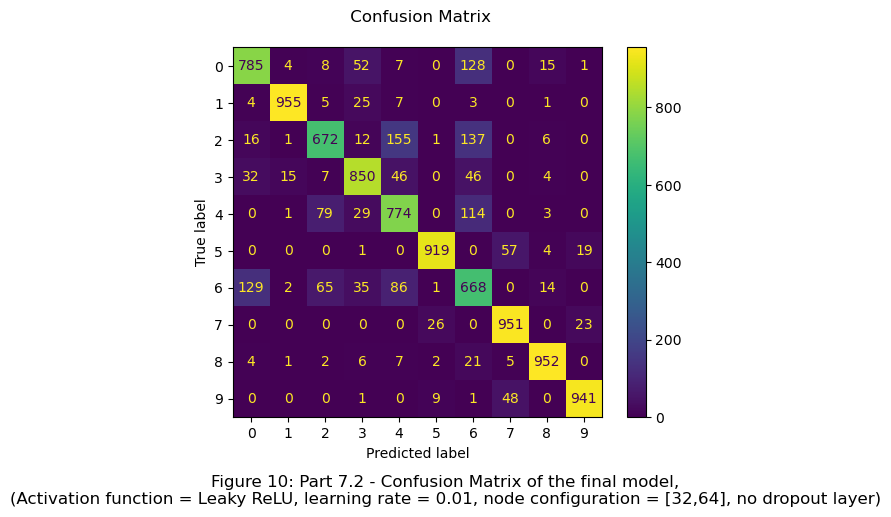

In [28]:
# Confusion Matrix - Summary 
## Obtaining matrix
summary_confmat = confusion_matrix(final_results['True Class'], 
                                   final_results['Predicted Class'], 
                                   labels = range(0,10))

## Visualizing Matrix
cm_display = ConfusionMatrixDisplay(summary_confmat).plot()
plt.title(" Confusion Matrix\n")
plt.suptitle("Figure 10: Part 7.2 - Confusion Matrix of the final model,\n(Activation function = Leaky ReLU," + 
             " learning rate = 0.01, node configuration = [32,64], no dropout layer)", x = 0.5, y = -.01)

3. Identify which class is most often incorrectly classified, explaining your reasoning

In [29]:
# Confusion Matrix - Multiclass
multiclass_confmat = multilabel_confusion_matrix(final_results['True Class'],
                                                 final_results['Predicted Class'],
                                                 labels = range(0,10))
# Obtaining incorrect classification counts  
false_positive = {}
false_negative = {}
class_label = 0
for class_cm in multiclass_confmat:
    false_positive[class_label] = class_cm[0,1]
    false_negative[class_label] = class_cm[1,0]
    class_label +=1

inaccuracy_counts = pd.DataFrame({"False Positive": false_positive, 'False Negative': false_negative})
inaccuracy_counts["Total Inaccuracies"] = inaccuracy_counts["False Positive"] + inaccuracy_counts["False Negative"]
inaccuracy_counts

,False Positive,False Negative,Total Inaccuracies
0,185,215,400
1,24,45,69
2,166,328,494
3,161,150,311
4,308,226,534
5,39,81,120
6,450,332,782
7,110,49,159
8,47,48,95
9,43,59,102


***Answer***

The above DataFrame indicates that class 4 has the most false positives while class 6 has the most False Negatives. Classes with over 300 total innaccuracies include:
- class 6 -> shirt
- class 4 -> Coat
- class 2 -> Pullover
- class 0 -> T-shirt
- class 3 -> Dress

Items that are being predicted with more accuracy include trousers, sandals, sneakers, bags, and ankle boots. Considering the only information available to the model is the images themselves, it stands to reason that the inaccuracy is a direct result of these items having similar shapes and occupying the same pixel locations in the image. Class 6/ shirts have pixels that fit within pullovers, coats, t-shirts, and dresses. It is clear that the model struggles to distinguish these classes from one another, with class 6 being more difficult as it has similarities with so many other classes.

In [30]:
# Demonstrating errors
## False Negative
instances_of_6 = final_results[final_results["True Class"] == 6]
incorrect_instances = instances_of_6[instances_of_6["Predicted Class"] != 6]
incorrect_instances_df = pd.DataFrame(incorrect_instances["Predicted Class"].value_counts())
label = [("class " + str(x)) for x in incorrect_instances_df.index]

## False Positive
instances_of_other = final_results[final_results["True Class"] != 6]
incorrect_classification = instances_of_other[instances_of_other["Predicted Class"] == 6]
incorrect_classification_df = pd.DataFrame(incorrect_classification["True Class"].value_counts())
label_1 = [("class " + str(x)) for x in incorrect_classification_df.index]

Text(0.5, -0.01, 'Figure 11: Part 7.3 - Observing the instances of false negatives and positive in class 6')

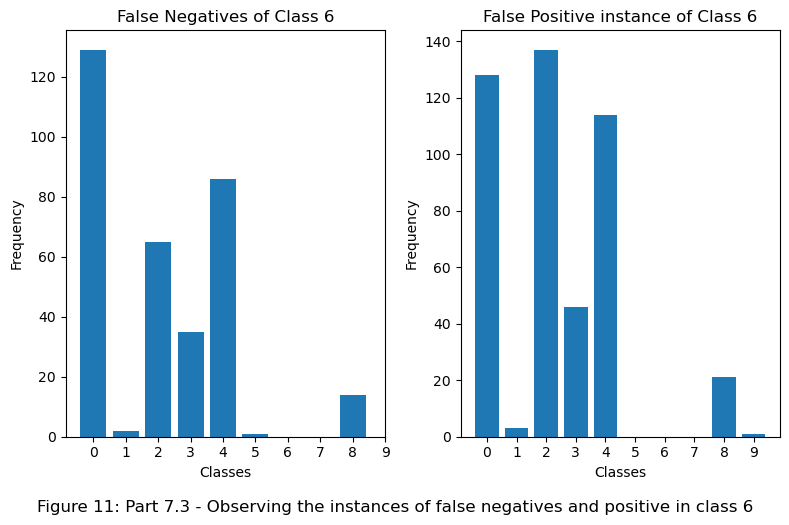

In [31]:
# Plotting
fig9 = plt.figure(figsize = [8,5])
plt.subplot(1,2,1)
plt.bar(incorrect_instances_df.index, incorrect_instances_df["Predicted Class"])
plt.title("False Negatives of Class 6")
plt.xticks([0,1,2,3,4,5,6,7,8,9])
plt.xlabel("Classes")
plt.ylabel("Frequency")
plt.tight_layout()

plt.subplot(1,2,2)
plt.bar(incorrect_classification_df.index, incorrect_classification_df["True Class"])
plt.title("False Positive instance of Class 6")
plt.xticks([0,1,2,3,4,5,6,7,8,9])
plt.xlabel("Classes")
plt.ylabel("Frequency")
plt.tight_layout()
plt.suptitle("Figure 11: Part 7.3 - Observing the instances of false negatives and positive in class 6", x = 0.5, y = -.01)

The above charts indicate this is indeed the case.

4. If the correct class is number 6 (shirt), which is the most likely error that your network will make (explain your reasoning).

***Answer***

The question is asking for the most likely false negative for class 6. Looking at the above chart, the most likely misclassification would be class 0 (T-shirts); mind you depending on the which run, class 2 and 4 also have a high likelihood as well. The chart on the left has collated all false negatives for class 6, and the most frequent occurrence observed is class 0. It stands to reason that this would be the most likely misclassification for this initilization of the model.

However, asking a question about a models innaccuracy is complicated. Clearly the model has trouble with these patterns, so they are a bit more fluid - particularly with the suboptimal selection of hyperparameters available from the given sets and the few epochs granted to it.